# Proton Energy Loss Correction using GEMC
 
FD proton inbending: [APSApril/ProtonMomentumCorrection3.ipynb](APSApril/ProtonMomentumCorrection3.ipynb)

FD proton outbending: [ProtonMomentumCorrection4.ipynb](ProtonMomentumCorrection4.ipynb)

CD protons: [ProtonMomentumCorrection5.ipynb](ProtonMomentumCorrection5.ipynb)

I update FD proton inbending correction because of the issue delivered in [ProtonMomentumCorrection7.ipynb](ProtonMomentumCorrection7.ipynb). Some protons reconstructed in FTOF2 for inbending electron setup, has an issue that the $\delta p$ vs. $p$ 2D histogram shows two strips. For the new study, please visit [ProtonMomentumCorrection8.ipynb](ProtonMomentumCorrection8.ipynb).

## Load Libs

In [1]:
import pandas as pd
import numpy as np
from utils.const import *
from utils.physics import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

ModuleNotFoundError: No module named 'utils'

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [4]:
df = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/pi0.pkl")

In [5]:
dict1 = {"Ep": "x00", "Etheta": "x01", "Ephi": "x02", "Pp": "x10", "Ptheta": "x11", "Pphi": "x12", "Gp": "x20", "Gtheta": "x21", "Gphi": "x22", "Gp2": "x30", "Gtheta2": "x31", "Gphi2": "x32"}
dict1.update({"GenEp": "z00", "GenEtheta": "z01", "GenEphi": "z02", "GenPp": "z10", "GenPtheta": "z11", "GenPphi": "z12", "GenGp": "z20", "GenGtheta": "z21", "GenGphi": "z22", "GenGp2": "z30", "GenGtheta2": "z31", "GenGphi2": "z32"})
dict2 = {y:x for x,y in dict1.items()}

In [6]:
df.drop(columns = ["x03", "x13", "x23", "x33", "z03", "z13", "z23", "z33"])
df = df.rename(columns = dict2)

In [7]:
df.loc[:, "Epx"] = df.loc[:, "Ep"]*np.sin(np.radians(df.loc[:, "Etheta"]))*np.cos(np.radians(df.loc[:, "Ephi"]))
df.loc[:, "Epy"] = df.loc[:, "Ep"]*np.sin(np.radians(df.loc[:, "Etheta"]))*np.sin(np.radians(df.loc[:, "Ephi"]))
df.loc[:, "Epz"] = df.loc[:, "Ep"]*np.cos(np.radians(df.loc[:, "Etheta"]))
df.loc[:, "Ppx"] = df.loc[:, "Pp"]*np.sin(np.radians(df.loc[:, "Ptheta"]))*np.cos(np.radians(df.loc[:, "Pphi"]))
df.loc[:, "Ppy"] = df.loc[:, "Pp"]*np.sin(np.radians(df.loc[:, "Ptheta"]))*np.sin(np.radians(df.loc[:, "Pphi"]))
df.loc[:, "Ppz"] = df.loc[:, "Pp"]*np.cos(np.radians(df.loc[:, "Ptheta"]))
df.loc[:, "Gpx"] = df.loc[:, "Gp"]*np.sin(np.radians(df.loc[:, "Gtheta"]))*np.cos(np.radians(df.loc[:, "Gphi"]))
df.loc[:, "Gpy"] = df.loc[:, "Gp"]*np.sin(np.radians(df.loc[:, "Gtheta"]))*np.sin(np.radians(df.loc[:, "Gphi"]))
df.loc[:, "Gpz"] = df.loc[:, "Gp"]*np.cos(np.radians(df.loc[:, "Gtheta"]))
df.loc[:, "Gpx2"] = df.loc[:, "Gp2"]*np.sin(np.radians(df.loc[:, "Gtheta2"]))*np.cos(np.radians(df.loc[:, "Gphi2"]))
df.loc[:, "Gpy2"] = df.loc[:, "Gp2"]*np.sin(np.radians(df.loc[:, "Gtheta2"]))*np.sin(np.radians(df.loc[:, "Gphi2"]))
df.loc[:, "Gpz2"] = df.loc[:, "Gp2"]*np.cos(np.radians(df.loc[:, "Gtheta2"]))

df.loc[:, "GenEpx"] = df.loc[:, "GenEp"]*np.sin(np.radians(df.loc[:, "GenEtheta"]))*np.cos(np.radians(df.loc[:, "GenEphi"]))
df.loc[:, "GenEpy"] = df.loc[:, "GenEp"]*np.sin(np.radians(df.loc[:, "GenEtheta"]))*np.sin(np.radians(df.loc[:, "GenEphi"]))
df.loc[:, "GenEpz"] = df.loc[:, "GenEp"]*np.cos(np.radians(df.loc[:, "GenEtheta"]))
df.loc[:, "GenPpx"] = df.loc[:, "GenPp"]*np.sin(np.radians(df.loc[:, "GenPtheta"]))*np.cos(np.radians(df.loc[:, "GenPphi"]))
df.loc[:, "GenPpy"] = df.loc[:, "GenPp"]*np.sin(np.radians(df.loc[:, "GenPtheta"]))*np.sin(np.radians(df.loc[:, "GenPphi"]))
df.loc[:, "GenPpz"] = df.loc[:, "GenPp"]*np.cos(np.radians(df.loc[:, "GenPtheta"]))
df.loc[:, "GenGpx"] = df.loc[:, "GenGp"]*np.sin(np.radians(df.loc[:, "GenGtheta"]))*np.cos(np.radians(df.loc[:, "GenGphi"]))
df.loc[:, "GenGpy"] = df.loc[:, "GenGp"]*np.sin(np.radians(df.loc[:, "GenGtheta"]))*np.sin(np.radians(df.loc[:, "GenGphi"]))
df.loc[:, "GenGpz"] = df.loc[:, "GenGp"]*np.cos(np.radians(df.loc[:, "GenGtheta"]))
df.loc[:, "GenGpx2"] = df.loc[:, "GenGp2"]*np.sin(np.radians(df.loc[:, "GenGtheta2"]))*np.cos(np.radians(df.loc[:, "GenGphi2"]))
df.loc[:, "GenGpy2"] = df.loc[:, "GenGp2"]*np.sin(np.radians(df.loc[:, "GenGtheta2"]))*np.sin(np.radians(df.loc[:, "GenGphi2"]))
df.loc[:, "GenGpz2"] = df.loc[:, "GenGp2"]*np.cos(np.radians(df.loc[:, "GenGtheta2"]))

In [ ]:
diffEp = df.loc[:, "Ep"] - df.loc[:, "GenEp"]
diffEpx = df.loc[:, "Epx"] - df.loc[:, "GenEpx"]
diffEpy = df.loc[:, "Epy"] - df.loc[:, "GenEpy"]
diffEpz = df.loc[:, "Epz"] - df.loc[:, "GenEpz"]

In [ ]:
plt.hist2d(df.loc[:, "Ephi"], df.loc[:, "GenEpx"] - df.loc[:, "Epx"], bins = [np.linspace(-180, 180, 51), np.linspace(-0.01, 0.01 , 51)], cmap = cmap, cmin =1)
plt.show()

In [ ]:
plt.hist2d(df.loc[:, "GenGphi"], df.loc[:, "GenGpx"] - df.loc[:, "Gpx"], bins = [np.linspace(-180, 180, 101), np.linspace(-0.05, 0.05 , 51)], cmap = cmap, cmin =1)
plt.show()

In [ ]:
def cos1(t):
    x = [ 0.008,  2.1932]
    return x[0]*np.sin(t/180*np.pi+x[1])

def sin1(t):
    x = [0.008, 0.6224]
    return x[0]*np.sin(t/180*np.pi+x[1])


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist2d(df.loc[:, "Pphi"], df.loc[:, "GenPpx"] - df.loc[:, "Ppx"], bins = [np.linspace(-180, 180, 61), np.linspace(-0.02, 0.02 , 51)], cmap = cmap, cmin =1)
ax[0].plot(np.linspace(-180, 180, 101), cos1(np.linspace(-180, 180, 101)), color='k', linewidth=4)
ax[0].set_ylabel("$\delta p_{x}$"+ " [" + GeV + "]")
ax[0].set_xlabel("$\phi$"+ " [" + degree + "]")

ax[1].hist2d(df.loc[:, "Pphi"], df.loc[:, "GenPpy"] - df.loc[:, "Ppy"], bins = [np.linspace(-180, 180, 61), np.linspace(-0.02, 0.02 , 51)], cmap = cmap, cmin =1)
ax[1].plot(np.linspace(-180, 180, 101), sin1(np.linspace(-180, 180, 101)), color='k', linewidth=4)
ax[1].set_ylabel("$\delta p_y$"+ " [" + GeV + "]")
ax[1].set_xlabel("$\phi$"+ " [" + degree + "]")

plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/correction_phi.pdf")

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.hist2d(df.loc[:, "Ptheta"], df.loc[:, "GenPp"] - df.loc[:, "Pp"], bins = [np.linspace(9, 45, 37), np.linspace(0, 0.05 , 51)], cmap = cmap, cmin =1)
ax.axvline(x=27, linewidth=4, color = 'k', linestyle = '--')
ax.set_xlabel(r"$\theta$" + " [" +degree+" ]")
ax.set_ylabel(r"$\delta p$" + " ["+GeVc +"]")
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [ ]:
print(len(df))

In [ ]:
dfn = []
for i in range(0, 12):
    dfi = df[df.Ptheta>9+3*i]
    dfi = dfi[dfi.Ptheta<15+3*i]
    dfn.append(dfi)

In [ ]:
def fun(x, t, y):
    return x[0] + x[1]/t - y

def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

In [ ]:
params_p = []
uncertainties_p = []
# loss = []
for ind, dfi in enumerate(dfn):
#     if ind<3:
#         x0 = [-0.00497,  0.00989223]
#     else:
#         x0 = [-0.02097534,  0.03317596]

    #from previous fit
#     x0s = [[-0.00954028,  0.01301059], [-0.00707975,  0.01093971], [-0.00438814,  0.00959533], [-0.01717612,  0.02865886], [-0.02014798,  0.0338319 ], [-0.03188756,  0.04206616]]
#     x0 = x0s[ind//2]

    x0s = [[-0.00954028,  0.01301059],
        [-0.00790359,  0.01176476],
        [-0.00707975,  0.01093971],
        [-0.00692119,  0.01065213],
        [-0.00438814,  0.00959533],
        [ 0.00043123,  0.00967919],
        [-0.0171344 ,  0.02862294],
        [-0.01760274,  0.0306995 ],
        [-0.0201493 ,  0.03383306],
        [-0.02404733,  0.03716457],
        [-0.03192866,  0.04208719],
        [-0.03192866,  0.04208719 ]]
    x0 = x0s[ind]

    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(x0, dfi["Pp"]))<0.01])
    for i in range (0, 5):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
        dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))
    


In [ ]:
fig, axs = plt.subplots(3,4, figsize=(20,8))
for col in range(0,4):
    for row in range(0, 3):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        axs[row, col].hist2d(dfn[ind].loc[:, "Pp"], dfn[ind].loc[:, "GenPp"] - dfn[ind].loc[:, "Pp"], bins = [np.linspace(0.3, 1.2, 101), np.linspace(-0.02, 0.1 , 51)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction(param, np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
        axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_ylim(-0.01, 0.1)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(3*ind+9)+" "+degree + r" $<\theta<$ " + str(3*ind+12)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/correction_p.pdf")

In [ ]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

In [ ]:
print(params_p)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*3+10.5, consts_p, xerr= 1.5, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*3+10.5, coeffs_p, xerr= 1.5, yerr = coeffs_uncertainties_p, color='k', linestyle = '')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [ ]:
# The last one doesn't fit well.
# params_p = params_p[10]
df11 = dfn[11]
# df11 = copy(df11[np.abs(df11["GenPp"]-df11["Pp"]-correction(param, dfi["Pp"]))<0.01])
plt.hist2d(df11.loc[:, "Pp"], df11.loc[:, "GenPp"] - df11.loc[:, "Pp"], bins = [np.linspace(0.3, 1.2, 101), np.linspace(-0.02, 0.1 , 51)], cmap = cmap, cmin =1)
plt.plot(np.linspace(0.3, 1.2, 101), correction(params_p[10], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
plt.plot(np.linspace(0.3, 1.2, 101), correction(params_p[11], np.linspace(0.3, 1.2, 101)), color='r', linewidth=2, linestyle='--')


In [ ]:
x = np.linspace(0, 11, 12)*3+10.5
x1 = x[0:5]
consts1_p = consts_p[0:5]
coeffs1_p = coeffs_p[0:5]
x2 = x[6:-1]
consts2_p = consts_p[6:-1]
coeffs2_p = coeffs_p[6:-1]

In [ ]:
def fun2(x, t, y):
    return x[0] + x[1]*t- y
def correction2(x, t):
    x0, x1 = x
    return x0 + x1*t

def fun3(x, t, y):
    return x[0] + x[1]*t + x[2]*t*t - y
def correction3(x, t):
    x0, x1, x2 = x
    return x0 + x1*t + x2*t*t

In [ ]:
res_lsq = least_squares(fun2, [0.005, -0.002], args=(x1, consts1_p))    
param1_p = res_lsq.x
res_lsq = least_squares(fun2, [0, 0], args=(x1, coeffs1_p))    
param2_p = res_lsq.x

res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_p))    
param3_p = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs2_p))    
param4_p = res_lsq.x

In [ ]:
print(param1_p, param2_p, param3_p, param4_p)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*3+10.5, consts_p, xerr= 1.5, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(9, 27, 3), correction2(param1_p, np.linspace(9, 27, 3)), color = 'b')
ax[0].plot(np.linspace(27, 42, 101), correction3(param3_p, np.linspace(27, 42, 101)), color = 'r')
ax[1].errorbar(np.linspace(0, 11, 12)*3+10.5, coeffs_p, xerr= 1.5, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[1].plot(np.linspace(9, 27, 3), correction2(param2_p, np.linspace(9, 27, 3)), color = 'b')
ax[1].plot(np.linspace(27, 42, 101), correction3(param4_p, np.linspace(27, 42, 101)), color = 'r')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [ ]:
def fun4(x, t, y):
    return x[0] + x[1]*np.exp(x[2]*t) - y
def correction4(x, t):
    x0, x1, x2 = x
    return x0 + x1*np.exp(x2*t)

In [ ]:
params_theta = []
uncertainties_theta = []
# loss = []
for ind, dfi in enumerate(dfn):
    if ind<3:
        params_theta.append("dummy")
        uncertainties_theta.append("dummy")
        continue
    elif ind <10:
        x0 = [0, -2, -3]
    elif ind == 10 :
        x0 = [0, -10, -3]
    elif ind == 11:
        x0 = [0, -20, -3]

    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(x0, dfi["Pp"]))<5])
    for i in range (0, 5):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
        dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))<5])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))
    


In [ ]:
params_theta[0] = params_theta[3]
params_theta[1] = params_theta[3]
params_theta[2] = params_theta[3]

uncertainties_theta[0] = uncertainties_theta[3]
uncertainties_theta[1] = uncertainties_theta[3]
uncertainties_theta[2] = uncertainties_theta[3]

In [ ]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]
coeffs2_theta = params_theta[:, 2]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]
coeffs2_uncertainties_theta = uncertainties_theta[:, 2]

In [ ]:
fig, axs = plt.subplots(3,4, figsize=(20,8))
for col in range(0,4):
    for row in range(0, 3):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        biny = np.linspace(-7, 2 , 51)
        if ind < 10:
            biny = np.linspace(-6, 6 , 51)
        axs[row, col].hist2d(dfn[ind].loc[:, "Pp"], dfn[ind].loc[:, "GenPtheta"] - dfn[ind].loc[:, "Ptheta"], bins = [np.linspace(0.3, 1.2, 101), biny], cmap = cmap, cmin =1)
        param = params_theta[ind]
        axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4(param, np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
#         else:
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, 0, 0], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
            #         if ind == 11:
#             param = params[10]
#         if (ind >2) and (ind<10):
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, -2, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
#         elif ind==10:
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, -10, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            
#         elif ind==11:
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, -20, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            
        axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(3*ind+9)+" "+degree + r" $<\theta<$ " + str(3*ind+12)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/correction_theta.pdf")

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
x = np.linspace(0, 11, 12)*3+10.5
ax[0].errorbar(x[:-2], consts_theta[:-2], xerr= 1.5, yerr = consts_uncertainties_theta[:-2], color='k', linestyle = '')
ax[1].errorbar(x[:-2], coeffs_theta[:-2], xerr= 1.5, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
ax[2].errorbar(x[:-2], coeffs2_theta[:-2], xerr= 1.5, yerr = coeffs2_uncertainties_theta[:-2], color='k', linestyle = '')
ax[0].set_ylim([-1, 4])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [ ]:
x = np.linspace(0, 11, 12)*3+10.5
x1 = x[3:6]
consts1_theta = consts_theta[3:6]
coeffs11_theta = coeffs_theta[3:6]
coeffs21_theta = coeffs2_theta[3:6]
x2 = x[6:-2]
consts2_theta = consts_theta[6:-2]
coeffs12_theta = coeffs_theta[6:-2]
coeffs22_theta = coeffs2_theta[6:-2]

res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, consts1_theta))    
param1_theta = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs11_theta))    
param2_theta = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs21_theta))    
param3_theta = res_lsq.x

res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_theta))    
param4_theta = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs12_theta))    
param5_theta = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs22_theta))    
param6_theta = res_lsq.x

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
x = np.linspace(0, 11, 12)*3+10.5
ax[0].errorbar(x[:], consts_theta[:], xerr= 1.5, yerr = consts_uncertainties_theta[:], color='k', linestyle = '')
x1 = np.linspace(19.5, 27, 101)
x2 = np.linspace(27, 39, 101)
ax[0].plot(x1, correction3(param1_theta, x1), color = 'b')
ax[0].plot(x2, correction3(param4_theta, x2), color = 'r')
ax[1].errorbar(x[:], coeffs_theta[:], xerr= 1.5, yerr = coeffs_uncertainties_theta[:], color='k', linestyle = '')
ax[1].plot(x1, correction3(param2_theta, x1), color = 'b')
ax[1].plot(x2, correction3(param5_theta, x2), color = 'r')
ax[2].errorbar(x[:], coeffs2_theta[:], xerr= 1.5, yerr = coeffs2_uncertainties_theta[:], color='k', linestyle = '')
ax[2].plot(x1, correction3(param3_theta, x1), color = 'b')
ax[2].plot(x2, correction3(param6_theta, x2), color = 'r')
ax[0].set_ylim([-1, 4])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [ ]:
params_phi = []
uncertainties_phi = []
# loss = []
for ind, dfi in enumerate(dfn):
    if (ind<2):
        params_phi.append("dummy")
        uncertainties_phi.append("dummy")
        continue
    elif (ind < 6):
        x0 = [0, 2, -3]
    elif (ind>=6) and (ind<10):
        x0 = [0, 20, -4]
    elif ind == 10:
        x0 = [0.86643134, 84.33022421, -6.18908624]
    elif ind == 11:
        x0  = [-3, 90, -3]
        
    dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(x0, dfi["Pp"]))<3])
    for i in range (0, 5):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
        dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))<5])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPphi"]-dfi["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))


In [ ]:
params_phi[0] = params_phi[2]
params_phi[1] = params_phi[2]
params_phi[10] = params_phi[9]
uncertainties_phi[0] = uncertainties_phi[2]
uncertainties_phi[1] = uncertainties_phi[2]
uncertainties_phi[10] = uncertainties_phi[9]

In [ ]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]
coeffs2_phi = params_phi[:, 2]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]
coeffs2_uncertainties_phi = uncertainties_phi[:, 2]

In [ ]:
x = np.linspace(0, 11, 12)*3+10.5
x1 = x[3:6]
consts1_phi = consts_phi[3:6]
coeffs11_phi = coeffs_phi[3:6]
coeffs21_phi = coeffs2_phi[3:6]
x2 = x[6:-2]
consts2_phi = consts_phi[6:-2]
coeffs12_phi = coeffs_phi[6:-2]
coeffs22_phi = coeffs2_phi[6:-2]

res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, consts1_phi))    
param1_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs11_phi))    
param2_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs21_phi))    
param3_phi = res_lsq.x

res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_phi))    
param4_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs12_phi))    
param5_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs22_phi))    
param6_phi = res_lsq.x

In [ ]:
fig, axs = plt.subplots(3,4, figsize=(20,8))
for col in range(0,4):
    for row in range(0, 3):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        biny = np.linspace(-10, 20 , 51)
        if ind < 6:
            biny = np.linspace(-3, 3 , 51)
        axs[row, col].hist2d(dfn[ind].loc[:, "Pp"], dfn[ind].loc[:, "GenPphi"] - dfn[ind].loc[:, "Pphi"], bins = [np.linspace(0.3, 1.2, 101), biny], cmap = cmap, cmin =1)

#         if (ind >=2) and (ind<6):
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, 2, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
#         elif (ind>=6) and (ind<10):
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, 20, -4], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            

        if ind==10:
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0.86643134, 84.33022421, -6.18908624], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            
            axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([correction3(param4_phi, 42), correction3(param5_phi, 40.5), correction3(param6_phi, 40.5)], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            
        else:
            param = params_phi[ind]
            axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4(param, np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')        
#         elif ind==11:
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([-3, 90, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            
        axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(3*ind+9)+" "+degree + r" $<\theta<$ " + str(3*ind+12)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/correction_phi2.pdf")

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
x = np.linspace(0, 11, 12)*3+10.5
ax[0].errorbar(x[:-1], consts_phi[:-1], xerr= 1.5, yerr = consts_uncertainties_phi[:-1], color='k', linestyle = '')
ax[1].errorbar(x[:-1], coeffs_phi[:-1], xerr= 1.5, yerr = coeffs_uncertainties_phi[:-1], color='k', linestyle = '')
ax[2].errorbar(x[:-1], coeffs2_phi[:-1], xerr= 1.5, yerr = coeffs2_uncertainties_phi[:-1], color='k', linestyle = '')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
x = np.linspace(0, 11, 12)*3+10.5
ax[0].errorbar(x[:], consts_phi[:], xerr= 1.5, yerr = consts_uncertainties_phi[:], color='k', linestyle = '')
x1 = np.linspace(16.5, 27, 101)
x2 = np.linspace(27, 42, 101)
ax[0].plot(x1, correction3(param1_phi, x1), color = 'b')
ax[0].plot(x2, correction3(param4_phi, x2), color = 'r')
ax[1].errorbar(x[:], coeffs_phi[:], xerr= 1.5, yerr = coeffs_uncertainties_phi[:], color='k', linestyle = '')
ax[1].plot(x1, correction3(param2_phi, x1), color = 'b')
ax[1].plot(x2, correction3(param5_phi, x2), color = 'r')
ax[2].errorbar(x[:], coeffs2_phi[:], xerr= 1.5, yerr = coeffs2_uncertainties_phi[:], color='k', linestyle = '')
ax[2].plot(x1, correction3(param3_phi, x1), color = 'b')
ax[2].plot(x2, correction3(param6_phi, x2), color = 'r')
ax[0].set_ylim([-1, 4])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [ ]:
plt.hist2d(df.Ptheta, coeff, bins = [np.linspace(9, 45, 101), np.linspace(-0.04, 0.05, 101)], cmap = cmap, cmin = 1)
plt.show()

In [ ]:
coeffs2_theta

In [ ]:
param4_theta

In [ ]:
params_phi

In [ ]:
param5_phi

In [ ]:
plt.hist2d(df.Ptheta, coeff2, bins = [np.linspace(9, 45, 101), 101], cmap = cmap, cmin = 1)
plt.show()

In [12]:
const = np.select([df.Ptheta<27, (df.Ptheta>=27) & (df.Ptheta<42), df.Ptheta>=42],
                  [-0.0123049 + 0.00028887*df.Ptheta, -0.138227479 + 8.07557430*0.001*df.Ptheta -1.34807927*0.0001*df.Ptheta*df.Ptheta, -0.0275235])
coeff = np.select([df.Ptheta<27, (df.Ptheta>=27) & (df.Ptheta<42), df.Ptheta>=42],
                  [0.01528006 - 0.00024079*df.Ptheta, 5.65817597*0.01 -2.36903348*0.001*df.Ptheta + 4.93780046*0.00001*df.Ptheta*df.Ptheta, 0.03998975])    

df.loc[:, "CorrectedPp"] = const + coeff/df.loc[:, "Pp"] + df.loc[:, "Pp"]

In [13]:
const = np.select([df.Ptheta<19.5, (df.Ptheta>=19.5) & (df.Ptheta<27), (df.Ptheta>=27) & (df.Ptheta<39), (df.Ptheta>=39) & (df.Ptheta<42), df.Ptheta>=42],
                  [2.63643690*0.01, 0.50047232 -0.03834672 *df.Ptheta + 0.00071967*df.Ptheta*df.Ptheta, 6.91308654 - 0.439839300*df.Ptheta +6.83075548*0.001*df.Ptheta*df.Ptheta, 1.59424606, 1.47198581*10])
coeff = np.select([df.Ptheta<19.5, (df.Ptheta>=19.5) & (df.Ptheta<27), (df.Ptheta>=27) & (df.Ptheta<39), (df.Ptheta>=39) & (df.Ptheta<42), df.Ptheta>=42],
                  [-1.46440415, 74.99891704  -6.1576777*df.Ptheta + 0.11469137*df.Ptheta*df.Ptheta, 682.909471 - 43.9551177 * df.Ptheta + 0.682383790 * df.Ptheta * df.Ptheta, -8.19627119, -23.55701865])    
coeff2 = np.select([df.Ptheta<19.5, (df.Ptheta>=19.5) & (df.Ptheta<27), (df.Ptheta>=27) & (df.Ptheta<39), (df.Ptheta>=39) & (df.Ptheta<42), df.Ptheta>=42],
                  [-3.47690993, 47.71351973 -4.34918241*df.Ptheta + 0.08841191*df.Ptheta*df.Ptheta, 100.33995753 - 6.96600416*df.Ptheta + 0.11223046*df.Ptheta*df.Ptheta, -1.25261927, -0.40113733])    

df.loc[:, "CorrectedPtheta"] = const + coeff*np.exp(coeff2*df.loc[:, "Pp"]) + df.loc[:, "Ptheta"]

In [14]:
const = np.select([df.Ptheta<16.5, (df.Ptheta>=16.5) & (df.Ptheta<27), (df.Ptheta>=27) & (df.Ptheta<42), df.Ptheta>=42],
                  [-0.190662844, -0.20725736 -0.00675627 *df.Ptheta + 0.0007863*df.Ptheta*df.Ptheta, 12.1881698 - 0.78906294*df.Ptheta +0.01297898*df.Ptheta*df.Ptheta, -4.59743066*10])
coeff = np.select([df.Ptheta<16.5, (df.Ptheta>=16.5) & (df.Ptheta<27), (df.Ptheta>=27) & (df.Ptheta<42), df.Ptheta>=42],
                  [6.48745941, 142.96379788  -16.66339055*df.Ptheta + 0.51311212*df.Ptheta*df.Ptheta, 2.1853046 + 5.78521226 * df.Ptheta - 0.09727796 * df.Ptheta * df.Ptheta, 7.46969457*10])    
coeff2 = np.select([df.Ptheta<16.5, (df.Ptheta>=16.5) & (df.Ptheta<27), (df.Ptheta>=27) & (df.Ptheta<42), df.Ptheta>=42],
                  [-3.14646608, 17.39529095 -1.78403359*df.Ptheta + 0.0335692*df.Ptheta*df.Ptheta, -1.03655317*10 + 0.161333213*df.Ptheta -1.29625675*0.001*df.Ptheta*df.Ptheta, -4.41246899*0.1])    

df.loc[:, "CorrectedPphi"] = const + coeff*np.exp(coeff2*df.loc[:, "Pp"]) + df.loc[:, "Pphi"]

In [15]:
dfn = []
for i in range(0, 12):
    dfi = df[df.Ptheta>9+3*i]
    dfi = dfi[dfi.Ptheta<15+3*i]
    dfn.append(dfi)

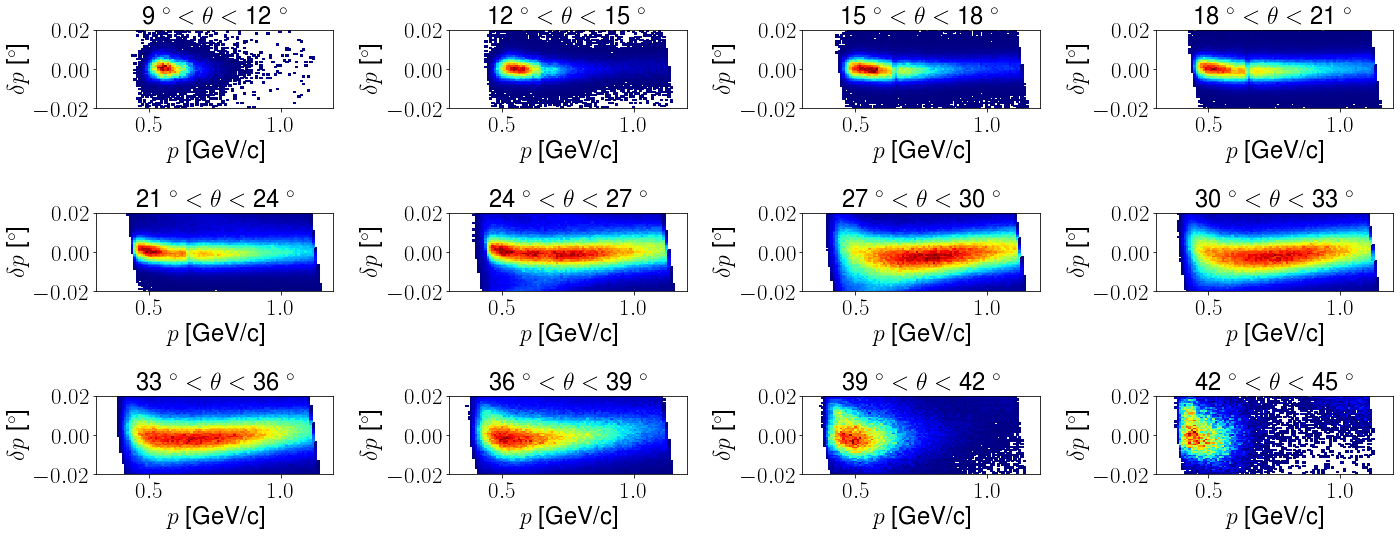

In [19]:
fig, axs = plt.subplots(3,4, figsize=(20,8))
for col in range(0,4):
    for row in range(0, 3):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        axs[row, col].hist2d(dfn[ind].loc[:, "Pp"], dfn[ind].loc[:, "GenPp"] - dfn[ind].loc[:, "CorrectedPp"], bins = [np.linspace(0.3, 1.2, 101), np.linspace(-0.02, 0.02 , 51)], cmap = cmap, cmin =1)
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction(param, np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
        axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(3*ind+9)+" "+degree + r" $<\theta<$ " + str(3*ind+12)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("correction_p_result.pdf")

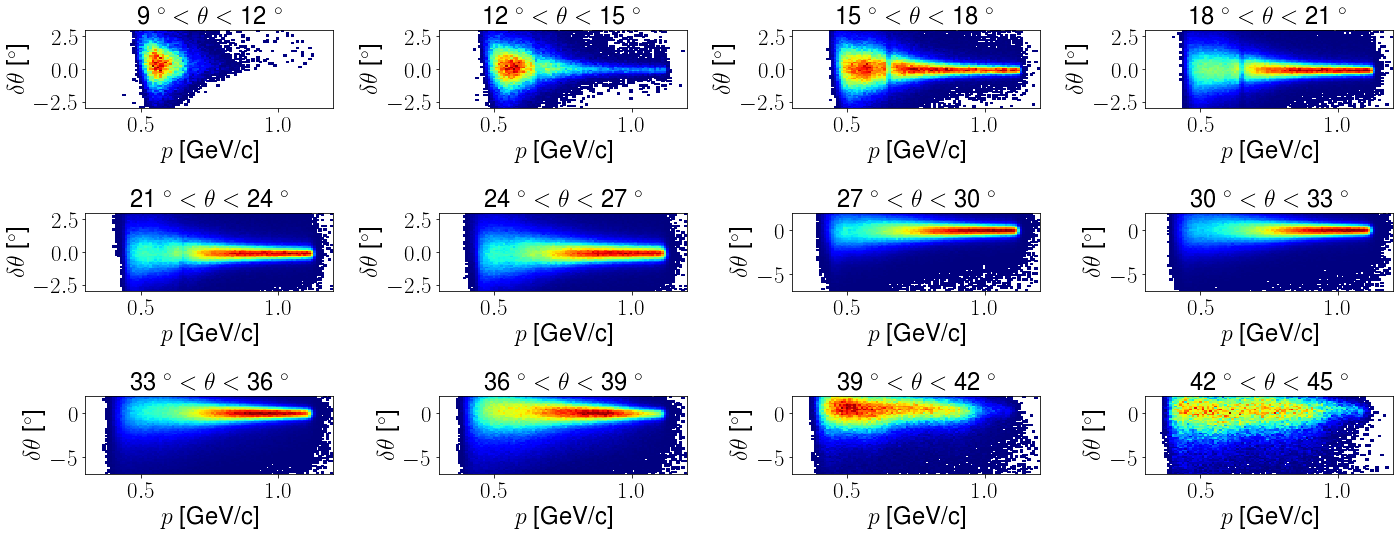

In [22]:
fig, axs = plt.subplots(3,4, figsize=(20,8))
for col in range(0,4):
    for row in range(0, 3):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        biny = np.linspace(-7, 2 , 51)
        if ind < 6:
            biny = np.linspace(-3, 3 , 51)
        axs[row, col].hist2d(dfn[ind].loc[:, "Pp"], dfn[ind].loc[:, "GenPtheta"] - dfn[ind].loc[:, "CorrectedPtheta"], bins = [np.linspace(0.3, 1.2, 101), biny], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4(param, np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
#         if ind == 11:
#             param = params[10]
#         if (ind >2) and (ind<10):
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, -2, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
#         elif ind==10:
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, -10, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            
#         elif ind==11:
#             axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4([0, -20, -3], np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')            
        axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(3*ind+9)+" "+degree + r" $<\theta<$ " + str(3*ind+12)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/correction_theta_result.pdf")

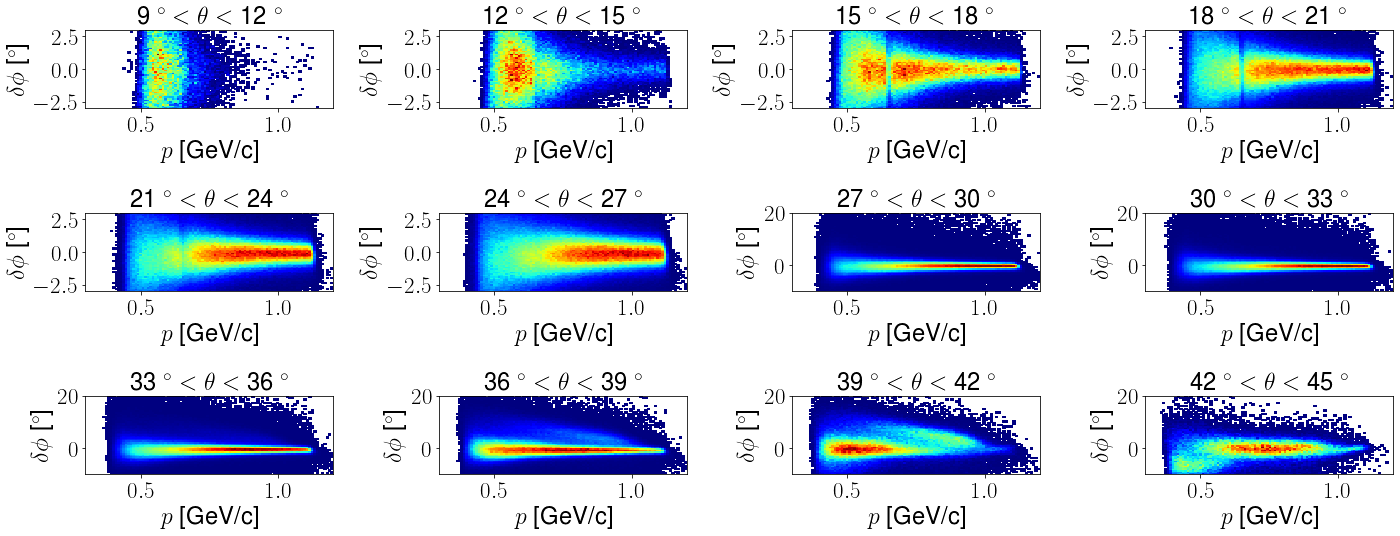

In [23]:
fig, axs = plt.subplots(3,4, figsize=(20,8))
for col in range(0,4):
    for row in range(0, 3):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        biny = np.linspace(-10, 20 , 51)
        if ind < 6:
            biny = np.linspace(-3, 3 , 51)
        axs[row, col].hist2d(dfn[ind].loc[:, "Pp"], dfn[ind].loc[:, "GenPphi"] - dfn[ind].loc[:, "CorrectedPphi"], bins = [np.linspace(0.3, 1.2, 101), biny], cmap = cmap, cmin =1)
#         param = params_phi[ind]
#         axs[row, col].plot(np.linspace(0.3, 1.2, 101), correction4(param, np.linspace(0.3, 1.2, 101)), color='k', linewidth=2, linestyle='--')
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(3*ind+9)+" "+degree + r" $<\theta<$ " + str(3*ind+12)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/correction_phi2_result.pdf")